In [23]:
with open('news', 'r') as f:
    text = f.read()
    news = text.split("\n\n")
    count = {'sport': 25000, 'world': 25000, "us": 25000, "business": 25000, "health": 25000, "entertainment": 25000, "sci_tech": 25000}
    for news_item in news:
        lines = news_item.split("\n")
        print(lines[6])
        file_to_write = open('data/' + lines[6] + '/' + str(count[lines[6]]) + '.txt', 'w+')
        count[lines[6]] = count[lines[6]] + 1
        file_to_write.write(news_item)  # python will convert \n to os.linesep
        file_to_write.close()
        




sport
business
sport
entertainment
us
entertainment
world
business
business
world
us
sport
entertainment
sport
world
health
world
world
us
entertainment
sport
us
us
sport
entertainment
world
business
sport
world
sci_tech
sport
entertainment
business
us
sport
world
world
sport
us
world
sci_tech
sport
health
entertainment
business
us
entertainment
entertainment
sport
sport
entertainment
us
entertainment
business
us
sport
sport
sport
entertainment
business
business
sport
entertainment
us
world
sport
sci_tech
sport
us
sport
business
sport
us
business
us
us
us
world
entertainment
business
world
business
sport
sport
sport
business
world
health
sport
sci_tech
world
entertainment
entertainment
sport
world
world
health
health
business
world
sport
sport
sport
sport
health
world
sport
sport
world
sport
world
world
health
world
world
sport
business
us
us
world
sport
health
business
sport
sport
world
world
us
sport
us
world
business
entertainment
us
entertainment
sci_tech
us
us
business
us
entertai

IndexError: list index out of range

In [24]:
import pandas
import glob

category_list = ["sport", "world", "us", "business", "health", "entertainment", "sci_tech"]
directory_list = ["data/sport/*.txt", "data/world/*.txt","data/us/*.txt","data/business/*.txt","data/health/*.txt","data/entertainment/*.txt","data/sci_tech/*.txt",]

text_files = list(map(lambda x: glob.glob(x), directory_list))
text_files = [item for sublist in text_files for item in sublist]

training_data = []


for t in text_files:
    f = open(t, 'r')
    f = f.read()
    t = f.split('\n')
    training_data.append({'data' : t[0] + ' ' + t[1], 'flag' : category_list.index(t[6])})
    
training_data[0]

{'data': "nba mvp smelling like rose, but others have case, too the nba mvp race looks cut and dry. chicago bulls point guard derrick rose is the winner, right? it's not that easy.",
 'flag': 0}

In [25]:
training_data = pandas.DataFrame(training_data, columns=['data', 'flag'])
training_data.to_csv("train_data.csv", sep=',', encoding='utf-8')
print(training_data.data.shape)
print(training_data)


(4969,)
                                                   data  flag
0     nba mvp smelling like rose, but others have ca...     0
1     on soccer: no messi means no chance for arsena...     0
2     hines ward earns a spot in dancing with the st...     0
3     on baseball: red sox put on their rally caps f...     0
4     spurs end road skid, top hawks tony parker sco...     0
...                                                 ...   ...
4964  murder of activists raises questions of justic...     6
4965  op-ed contributor: the gas is greener sunlight...     6
4966  facebook hires duo behind daytum, a personal d...     6
4967  nintendo 3ds is fun, addictive and pricey the ...     6
4968  'witcher' sequel delivers intense action, role...     6

[4969 rows x 2 columns]


In [26]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer


#GET VECTOR COUNT
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(training_data.data)

#SAVE WORD VECTOR
pickle.dump(count_vect.vocabulary_, open("count_vector.pkl","wb"))

In [27]:
import pickle
from sklearn.feature_extraction.text import TfidfTransformer

#TRANSFORM WORD VECTOR TO TF IDF
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
#SAVE TF-IDF
pickle.dump(tfidf_transformer, open("tfidf.pkl","wb"))

In [28]:
# Multinomial Naive Bayes start

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

#clf = MultinomialNB().fit(X_train_tfidf, training_data.flag)
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.flag, test_size=0.25, random_state=42)
clf = MultinomialNB().fit(X_train, y_train)

#SAVE MODEL
pickle.dump(clf, open("nb_model.pkl", "wb"))

In [29]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

category_list = ["sport", "world", "us", "business", "health", "entertainment", "sci_tech"]

docs_new = "BP to pay $25 million penalty over Alaska spill"
docs_new = [docs_new]

#LOAD MODEL
loaded_vec = CountVectorizer(vocabulary=pickle.load(open("count_vector.pkl", "rb")))
loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
loaded_model = pickle.load(open("nb_model.pkl","rb"))

X_new_counts = loaded_vec.transform(docs_new)
X_new_tfidf = loaded_tfidf.transform(X_new_counts)
predicted = loaded_model.predict(X_new_tfidf)

print("Bayesian Prediction: ",category_list[predicted[0]])






Bayesian Prediction:  business


In [30]:
b_predicted = loaded_model.predict(X_test)
result_bayes = pandas.DataFrame( {'true_labels': y_test,'predicted_labels': b_predicted})
result_bayes.to_csv('res_bayes.csv', sep = ',')

for predicted_item, result in zip(b_predicted, y_test):
    print(category_list[predicted_item], ' - ', category_list[result])



ch
world  -  world
world  -  health
world  -  world
world  -  world
us  -  us
sport  -  sport
sport  -  sport
world  -  world
us  -  us
us  -  us
world  -  world
entertainment  -  entertainment
entertainment  -  entertainment
business  -  business
business  -  business
business  -  health
world  -  world
sport  -  sport
world  -  world
sport  -  sport
business  -  business
sport  -  sport
sci_tech  -  sci_tech
us  -  us
sport  -  sport
us  -  us
sport  -  health
entertainment  -  entertainment
world  -  world
entertainment  -  entertainment
business  -  business
entertainment  -  entertainment
business  -  business
business  -  business
sport  -  sport
entertainment  -  entertainment
business  -  business
business  -  business
sport  -  sport
health  -  health
sport  -  sport
world  -  world
world  -  world
world  -  world
sport  -  sport
world  -  health
sport  -  sport
entertainment  -  entertainment
entertainment  -  entertainment
world  -  business
sport  -  sport
business  -  worl

Rocp array: [[array([1.        , 0.97807018, 0.91515152, 0.96373057, 0.46987952,
       0.87878788, 0.82352941]), array([0.03418803, 0.03251232, 0.        , 0.04095238, 0.        ,
       0.        , 0.        ])]]
TPR
[1.         0.97807018 0.91515152 0.96373057 0.46987952 0.87878788
 0.82352941]
FPR
[0.03418803 0.03251232 0.         0.04095238 0.         0.
 0.        ]
ACC
[0.97425583 0.9694288  0.98873693 0.95977474 0.96460177 0.9839099
 0.98551891]


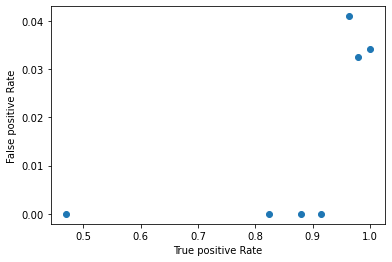

In [31]:
#roc calculation and plot
import pandas
import numpy as np
import matplotlib. pyplot as plt
from sklearn.metrics import confusion_matrix

rocp = []

cnf_matrix = confusion_matrix(y_test, b_predicted)

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)

# Fall out or false positive rate
FPR = FP/(FP+TN)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

rocp.append([TPR,FPR])
print("Rocp array:",rocp)
print('TPR')
print(TPR)
print('FPR')
print(FPR)  
print("ACC")
print(ACC)  

plt.scatter(TPR, FPR)
plt.xlabel('True positive Rate')
plt.ylabel('False positive Rate')
plt.show()

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix:\n", confusion_matrix(y_test, b_predicted))
print("Classification Report:\n", classification_report(y_test, b_predicted))
# Model Accuracy, how often is the classifier correct?
print("Accuracy: ", metrics.accuracy_score(y_test, predicted))

Confusion Matrix:
 [[307   0   0   0   0   0   0]
 [  0 223   0   5   0   0   0]
 [  0   8 151   6   0   0   0]
 [  1   6   0 186   0   0   0]
 [ 10  16   0  18  39   0   0]
 [ 14   3   0   3   0 145   0]
 [  7   0   0  11   0   0  84]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       307
           1       0.87      0.98      0.92       228
           2       1.00      0.92      0.96       165
           3       0.81      0.96      0.88       193
           4       1.00      0.47      0.64        83
           5       1.00      0.88      0.94       165
           6       1.00      0.82      0.90       102

    accuracy                           0.91      1243
   macro avg       0.94      0.86      0.88      1243
weighted avg       0.92      0.91      0.91      1243



NameError: name 'metrics' is not defined

In [20]:
# Bayesian end #############################

In [34]:
# Neural Network Softmax start #############################

from sklearn.neural_network import MLPClassifier

clf_neural = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.flag, test_size=0.25, random_state=42)

clf_neural.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15,), random_state=1,
              solver='lbfgs')

In [35]:
pickle.dump(clf_neural, open("softmax.pkl", "wb"))

In [37]:
s_predicted = clf_neural.predict(X_test)
result_softmax = pandas.DataFrame( {'true_labels': y_test,'predicted_labels': s_predicted})
result_softmax.to_csv('res_softmax.csv', sep = ',')

for predicted_item, result in zip(s_predicted, y_test):
    print(category_list[predicted_item], ' - ', category_list[result])


world
us  -  us
us  -  us
world  -  world
entertainment  -  entertainment
entertainment  -  entertainment
business  -  business
business  -  business
health  -  health
world  -  world
sport  -  sport
world  -  world
sport  -  sport
business  -  business
sport  -  sport
sci_tech  -  sci_tech
us  -  us
sport  -  sport
us  -  us
health  -  health
entertainment  -  entertainment
world  -  world
entertainment  -  entertainment
business  -  business
entertainment  -  entertainment
business  -  business
business  -  business
sport  -  sport
entertainment  -  entertainment
business  -  business
business  -  business
sport  -  sport
health  -  health
sport  -  sport
world  -  world
world  -  world
world  -  world
sport  -  sport
health  -  health
sport  -  sport
entertainment  -  entertainment
entertainment  -  entertainment
business  -  business
sport  -  sport
world  -  world
health  -  health
entertainment  -  entertainment
entertainment  -  entertainment
business  -  business
sport  -  spor

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix:\n", confusion_matrix(y_test, s_predicted))
print("Classification Report:\n", classification_report(y_test, s_predicted))
print("Accuracy:",accuracy_score(y_test, s_predicted))


Confusion Matrix:
 [[307   0   0   0   0   0   0]
 [  0 225   3   0   0   0   0]
 [  0   0 162   0   0   3   0]
 [  0   0   0 193   0   0   0]
 [  0   0   0   0  83   0   0]
 [  0   0   0   0   0 165   0]
 [  0   0   0   0   0   0 102]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      0.99      0.99       228
           2       0.98      0.98      0.98       165
           3       1.00      1.00      1.00       193
           4       1.00      1.00      1.00        83
           5       0.98      1.00      0.99       165
           6       1.00      1.00      1.00       102

    accuracy                           1.00      1243
   macro avg       0.99      1.00      1.00      1243
weighted avg       1.00      1.00      1.00      1243

Accuracy: 0.995172968624296


Rocp array: [[array([1.        , 0.98684211, 0.98181818, 1.        , 1.        ,
       1.        , 1.        ]), array([0.        , 0.        , 0.00278293, 0.        , 0.        ,
       0.00278293, 0.        ])]]
TPR
[1.         0.98684211 0.98181818 1.         1.         1.
 1.        ]
FPR
[0.         0.         0.00278293 0.         0.         0.00278293
 0.        ]
ACC
[1.         0.99758648 0.99517297 1.         1.         0.99758648
 1.        ]


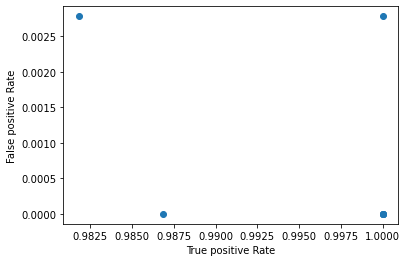

In [15]:
#roc calculation and plot
import pandas
import numpy as np
import matplotlib. pyplot as plt
from sklearn.metrics import confusion_matrix


rocp = []

cnf_matrix = confusion_matrix(y_test, s_predicted)

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)

# Fall out or false positive rate
FPR = FP/(FP+TN)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

rocp.append([TPR,FPR])


print("Rocp array:",rocp)
print('TPR')
print(TPR)
print('FPR')
print(FPR)  
print("ACC")
print(ACC)  

plt.scatter(TPR, FPR)
plt.xlabel('True positive Rate')
plt.ylabel('False positive Rate')
plt.show()

In [25]:
# Neural Network Softmax end #############################

In [16]:
# SVM Model start ########################################

from sklearn import svm
clf_svm = svm.LinearSVC()
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.flag, test_size=0.25, random_state=42)
clf_svm.fit(X_train_tfidf, training_data.flag)
pickle.dump(clf_svm, open("svm.pkl", "wb"))

In [17]:
svm_predicted = clf_svm.predict(X_test)
result_svm = pandas.DataFrame( {'true_labels': y_test,'predicted_labels': svm_predicted})
result_svm.to_csv('res_svm.csv', sep = ',')
for predicted_item, result in zip(svm_predicted, y_test):
    print(category_list[predicted_item], ' - ', category_list[result])

ort  -  sport
world  -  world
us  -  us
us  -  us
world  -  world
entertainment  -  entertainment
entertainment  -  entertainment
business  -  business
business  -  business
health  -  health
world  -  world
sport  -  sport
world  -  world
sport  -  sport
business  -  business
sport  -  sport
sci_tech  -  sci_tech
us  -  us
sport  -  sport
us  -  us
health  -  health
entertainment  -  entertainment
world  -  world
entertainment  -  entertainment
business  -  business
entertainment  -  entertainment
business  -  business
business  -  business
sport  -  sport
entertainment  -  entertainment
business  -  business
business  -  business
sport  -  sport
health  -  health
sport  -  sport
world  -  world
world  -  world
world  -  world
sport  -  sport
health  -  health
sport  -  sport
entertainment  -  entertainment
entertainment  -  entertainment
business  -  business
sport  -  sport
world  -  world
health  -  health
entertainment  -  entertainment
entertainment  -  entertainment
business  - 

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix:\n", confusion_matrix(y_test, svm_predicted))
print("Classification Report:\n", classification_report(y_test,svm_predicted))
# Model Accuracy, how often is the classifier correct?
print("Accuracy: ",accuracy_score(y_test,svm_predicted))

Confusion Matrix:
 [[307   0   0   0   0   0   0]
 [  0 228   0   0   0   0   0]
 [  0   0 165   0   0   0   0]
 [  0   0   0 193   0   0   0]
 [  0   0   0   0  83   0   0]
 [  0   0   0   0   0 165   0]
 [  0   0   0   0   0   0 102]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       228
           2       1.00      1.00      1.00       165
           3       1.00      1.00      1.00       193
           4       1.00      1.00      1.00        83
           5       1.00      1.00      1.00       165
           6       1.00      1.00      1.00       102

    accuracy                           1.00      1243
   macro avg       1.00      1.00      1.00      1243
weighted avg       1.00      1.00      1.00      1243

Accuracy:  1.0


In [39]:
#roc calculation and plot
import pandas
import numpy as np
import matplotlib. pyplot as plt
from sklearn.metrics import confusion_matrix


rocp = []

cnf_matrix = confusion_matrix(y_test, svm_predicted)

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)

# Fall out or false positive rate
FPR = FP/(FP+TN)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

rocp.append([TPR,FPR])


print("Rocp array:",rocp)
print('TPR')
print(TPR)
print('FPR')
print(FPR)  
print("ACC")
print(ACC)  

plt.scatter(TPR, FPR)
plt.xlabel('True positive Rate')
plt.ylabel('False positive Rate')
plt.show()

NameError: name 'svm_predicted' is not defined

In [40]:
###### Random Forest Regressor Starts ##########################

import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.flag, test_size=0.2, random_state=0)

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=50, random_state=0)
regressor.fit(X_train, y_train)
reg_pred = regressor.predict(X_test)

In [41]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, reg_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, reg_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, reg_pred)))

Mean Absolute Error:  0.2165191146881288
Mean Squared Error:  0.1554329979879276
Root Mean Squared Error:  0.3942499181837931


In [ ]:
###### Random Forest Regressor Ends ##########################

In [42]:
###### Random Forest Classifier Starts ##########################

from sklearn.ensemble import RandomForestClassifier

# Create a Gaussian Classifier
clf_random= RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_random.fit(X_train, y_train)

y_pred = clf.predict(X_test)

X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.flag, test_size=0.25, random_state=42)
clf_random.fit(X_train_tfidf, training_data.flag)
pickle.dump(clf_random, open("random.pkl", "wb"))

In [43]:
random_pred=clf_random.predict(X_test)
result_random = pandas.DataFrame( {'true_labels': y_test,'predicted_labels': random_pred})
result_random.to_csv('res_random.csv', sep = ',')

for predicted_item, result in zip(predicted, y_test):
    print(category_list[predicted_item], ' - ', category_list[result])

print("Random Forest Prediction:" + "  " + category_list[random_pred[0]])

business  -  sport
Random Forest Prediction:  sport


In [33]:
###### Random Forest Classifier Ends ##########################


In [24]:
#Import scikit-learn metrics module for confusion matrix, accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix:\n", confusion_matrix(y_test, random_pred))
print("Classification Report:\n", classification_report(y_test, random_pred))
# Model Accuracy, how often is the classifier correct?
print("Accuracy: ", accuracy_score(y_test, random_pred))

Confusion Matrix:
 [[307   0   0   0   0   0   0]
 [  0 228   0   0   0   0   0]
 [  0   0 165   0   0   0   0]
 [  0   0   0 193   0   0   0]
 [  0   0   0   0  83   0   0]
 [  0   0   0   0   0 165   0]
 [  0   0   0   0   0   0 102]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       228
           2       1.00      1.00      1.00       165
           3       1.00      1.00      1.00       193
           4       1.00      1.00      1.00        83
           5       1.00      1.00      1.00       165
           6       1.00      1.00      1.00       102

    accuracy                           1.00      1243
   macro avg       1.00      1.00      1.00      1243
weighted avg       1.00      1.00      1.00      1243

Accuracy:  1.0


Rocp array: [[array([1., 1., 1., 1., 1., 1., 1.]), array([0., 0., 0., 0., 0., 0., 0.])]]
TPR
[1. 1. 1. 1. 1. 1. 1.]
FPR
[0. 0. 0. 0. 0. 0. 0.]
ACC
[1. 1. 1. 1. 1. 1. 1.]


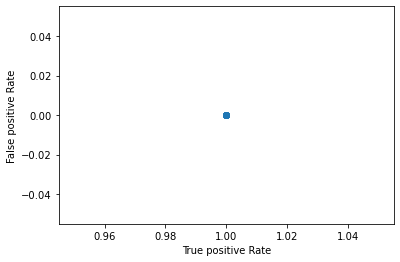

In [25]:
#roc calculation and plot
import pandas
import numpy as np
import matplotlib. pyplot as plt
from sklearn.metrics import confusion_matrix


rocp = []

cnf_matrix = confusion_matrix(y_test, random_pred)

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)

# Fall out or false positive rate
FPR = FP/(FP+TN)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

rocp.append([TPR,FPR])


print("Rocp array:",rocp)
print('TPR')
print(TPR)
print('FPR')
print(FPR)  
print("ACC")
print(ACC)  

plt.scatter(TPR, FPR)
plt.xlabel('True positive Rate')
plt.ylabel('False positive Rate')
plt.show()

In [26]:
# Decision Tree Classifier starts #################

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf_decision = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.flag, test_size=0.25, random_state=42)

clf_decision.fit(X_train_tfidf, training_data.flag)
pickle.dump(clf_decision, open("decisionmodel.pkl", "wb"))

In [27]:
# train the model using the training sets y_pred=clf.predict(X_test)
decision_pred = clf_decision.predict(X_test)
result_decision = pandas.DataFrame( {'true_labels': y_test,'predicted_labels': decision_pred})
result_decision.to_csv('res_decision.csv', sep = ',')

# for predicted_item, result in zip(predicted, y_test):
    # print(category_list[predicted_item], ' - ', category_list[result])

print( "Decision Tree Prediction:" + "  "  + category_list[decision_pred[0]])


Decision Tree Prediction:  sport


In [28]:
#Import scikit-learn metrics module for confusion matrix, accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix:\n", confusion_matrix(y_test, decision_pred))
print("Classification Report:\n", classification_report(y_test, decision_pred))
# Model Accuracy, how often is the classifier correct?
print("Accuracy: ", accuracy_score(y_test, decision_pred))

Confusion Matrix:
 [[307   0   0   0   0   0   0]
 [  0 228   0   0   0   0   0]
 [  0   0 165   0   0   0   0]
 [  0   0   0 193   0   0   0]
 [  0   0   0   0  83   0   0]
 [  0   0   0   0   0 165   0]
 [  0   0   0   0   0   0 102]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       228
           2       1.00      1.00      1.00       165
           3       1.00      1.00      1.00       193
           4       1.00      1.00      1.00        83
           5       1.00      1.00      1.00       165
           6       1.00      1.00      1.00       102

    accuracy                           1.00      1243
   macro avg       1.00      1.00      1.00      1243
weighted avg       1.00      1.00      1.00      1243

Accuracy:  1.0


Rocp array: [[array([1., 1., 1., 1., 1., 1., 1.]), array([0., 0., 0., 0., 0., 0., 0.])]]
TPR
[1. 1. 1. 1. 1. 1. 1.]
FPR
[0. 0. 0. 0. 0. 0. 0.]
ACC
[1. 1. 1. 1. 1. 1. 1.]


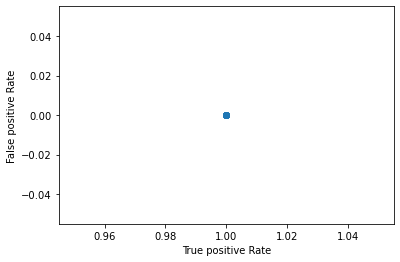

In [29]:
#roc calculation and plot
import pandas
import numpy as np
import matplotlib. pyplot as plt
from sklearn.metrics import confusion_matrix


rocp = []

cnf_matrix = confusion_matrix(y_test, decision_pred)

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)

# Fall out or false positive rate
FPR = FP/(FP+TN)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

rocp.append([TPR,FPR])


print("Rocp array:",rocp)
print('TPR')
print(TPR)
print('FPR')
print(FPR)  
print("ACC")
print(ACC)  

plt.scatter(TPR, FPR)
plt.xlabel('True positive Rate')
plt.ylabel('False positive Rate')
plt.show()

In [38]:
# Decision Tree Classifier Ends #################

In [30]:
### AdaBoost Classifier starts #######################
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)

X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.flag, test_size=0.3, random_state=42)

# Train Adaboost classifier
model = abc.fit(X_train_tfidf, training_data.flag)

pickle.dump(abc, open("adaboostmodel.pkl", "wb"))

In [31]:
# train the model using the training sets y_pred=clf.predict(X_test)
ada_pred = model.predict(X_test)
result_decision = pandas.DataFrame( {'true_labels': y_test,'predicted_labels': ada_pred})
result_decision.to_csv('res_adaboost.csv', sep = ',')

# for predicted_item, result in zip(predicted, y_test):
    # print(category_list[predicted_item], ' - ', category_list[result])

print( "Ada Boost Prediction:" + "  "  + category_list[ada_pred[0]])

Ada Boost Prediction:  sport


In [32]:
#Import scikit-learn metrics module for confusion matrix, accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix:\n", confusion_matrix(y_test, ada_pred))
print("Classification Report:\n", classification_report(y_test, ada_pred))
# Model Accuracy, how often is the classifier correct?
print("Accuracy: ", accuracy_score(y_test, ada_pred))

Confusion Matrix:
 [[358   2   0   0   2   6   0]
 [158 116   1   5   0   0   0]
 [174  18   7   5   1   4   1]
 [178   7   1  35   3   1   0]
 [  2  14   4  18  42   5   9]
 [161   5   9   0   3  15   0]
 [105   2   0   2   1   5   6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.97      0.48       368
           1       0.71      0.41      0.52       280
           2       0.32      0.03      0.06       210
           3       0.54      0.16      0.24       225
           4       0.81      0.45      0.58        94
           5       0.42      0.08      0.13       193
           6       0.38      0.05      0.09       121

    accuracy                           0.39      1491
   macro avg       0.50      0.31      0.30      1491
weighted avg       0.47      0.39      0.32      1491

Accuracy:  0.38832997987927564


Rocp array: [[array([0.97282609, 0.41428571, 0.03333333, 0.15555556, 0.44680851,
       0.07772021, 0.04958678]), array([0.69278718, 0.03963666, 0.0117096 , 0.02369668, 0.0071582 ,
       0.01617874, 0.00729927])]]
TPR
[0.97282609 0.41428571 0.03333333 0.15555556 0.44680851 0.07772021
 0.04958678]
FPR
[0.69278718 0.03963666 0.0117096  0.02369668 0.0071582  0.01617874
 0.00729927]
ACC
[0.47149564 0.85781355 0.8537894  0.85244802 0.95841717 0.86653253
 0.91616365]


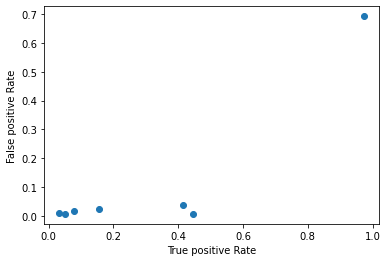

In [33]:
#roc calculation and plot
import pandas
import numpy as np
import matplotlib. pyplot as plt
from sklearn.metrics import confusion_matrix


rocp = []

cnf_matrix = confusion_matrix(y_test, ada_pred)

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)

# Fall out or false positive rate
FPR = FP/(FP+TN)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

rocp.append([TPR,FPR])


print("Rocp array:",rocp)
print('TPR')
print(TPR)
print('FPR')
print(FPR)  
print("ACC")
print(ACC)  

plt.scatter(TPR, FPR)
plt.xlabel('True positive Rate')
plt.ylabel('False positive Rate')
plt.show()

In [44]:
### AdaBoost Classifier Ends #######################

In [34]:
#For plotting 
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score,precision_score,recall_score

In [35]:
fscore_ada = f1_score(y_test, ada_pred, average='macro')
print(fscore_ada)

0.2991783662403365


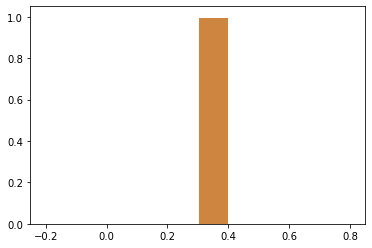

In [36]:
plt.hist(fscore_ada, facecolor='peru',edgecolor='white', bins=10)
plt.show()

Nearest_Neighbors
[[344  11   2   4   0   3   4]
 [  2 268   0  10   0   0   0]
 [  7   5 185   4   2   7   0]
 [  0  12   8 191   4   2   8]
 [  3   4   3   0  74   3   7]
 [  4   3   3   4   2 177   0]
 [  3   0   0   8   2   0 108]]
Linear_SVM
[[368   0   0   0   0   0   0]
 [280   0   0   0   0   0   0]
 [210   0   0   0   0   0   0]
 [225   0   0   0   0   0   0]
 [ 94   0   0   0   0   0   0]
 [193   0   0   0   0   0   0]
 [121   0   0   0   0   0   0]]
Polynomial_SVM
[[368   0   0   0   0   0   0]
 [280   0   0   0   0   0   0]
 [210   0   0   0   0   0   0]
 [225   0   0   0   0   0   0]
 [ 94   0   0   0   0   0   0]
 [193   0   0   0   0   0   0]
 [121   0   0   0   0   0   0]]
RBF_SVM
[[368   0   0   0   0   0   0]
 [  0 280   0   0   0   0   0]
 [ 15   0 195   0   0   0   0]
 [  0   0   0 225   0   0   0]
 [  8   0   0   0  86   0   0]
 [  3   0   0   0   0 190   0]
 [  0   0   0   0   0   0 121]]
Gradient_Boosting
[[365   3   0   0   0   0   0]
 [  3 277   0   0   0   0  

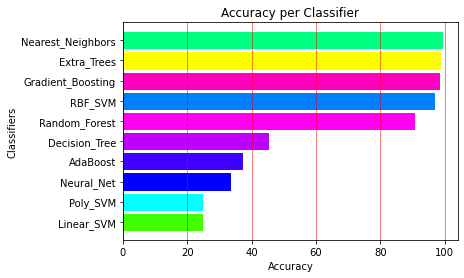

<ipython-input-37-889149954c37>:144: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  color2 = plt.subplot(111)
[5.655882578959503, 5.655882578959503, 18.336682795571114, 26.718997385648496, 27.744150760250267, 89.13162088006581, 95.50702056290034, 98.23664122054369, 98.62285099843209, 99.07205868813898]
Ranks: [1, 1, 3, 4, 5, 6, 7, 8, 9, 10]


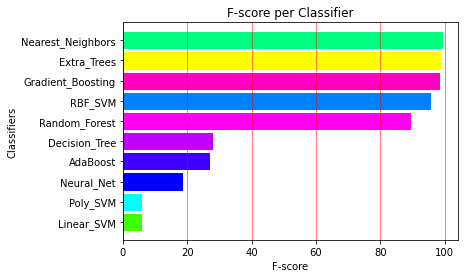

<ipython-input-37-889149954c37>:170: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  color3 = plt.subplot(111)
[14.285714285714285, 14.285714285714285, 21.672591212411245, 27.897918697690816, 31.465498807467718, 88.83801724714141, 94.19398496105771, 97.54172863059898, 98.28827377964842, 98.76187626412046]


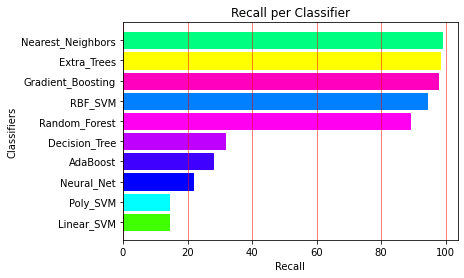

<ipython-input-37-889149954c37>:196: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  color4 = plt.subplot(111)
[24.681421864520456, 24.681421864520456, 33.13212608987257, 36.88799463447351, 45.204560697518446, 90.3420523138833, 96.579476861167, 98.25620389000672, 98.52448021462106, 99.12810194500335]


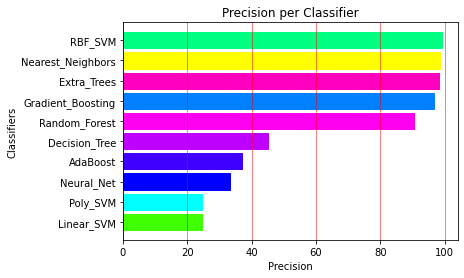

In [37]:
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score,precision_score,recall_score
import random as random 


scores = []
fscorearr = []
precarr = []
recallarr = []
accuarr = []
ranks = []

#GET VECTOR COUNT
count_vector = CountVectorizer()
X_train_counts = count_vector.fit_transform(training_data.data)


#TRANSFORM WORD VECTOR TO TF IDF
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.flag, test_size=0.3, random_state=42)

# print("X-train", X_train)
# print("y_train", y_train)


names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    # GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    # GaussianNB(),
    # QuadraticDiscriminantAnalysis(),
    # SGDClassifier(loss="hinge", penalty="l2")
     ]

 
for name, clf in zip(names, classifiers):
    
    model = clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    predicted = model.predict(X_test)
    
    # scores.append(score)
    # plt.hist(score, facecolor='peru',edgecolor='white', bins=10)
    

    # clf_tree = DecisionTreeClassifier();
    # model = clf_tree.fit(X_train, y_train);
    

    fscore = f1_score(y_test, predicted, average='macro')
    precision = precision_score(y_test, predicted, average='micro')
    recall = recall_score(y_test, predicted, average='macro')
    accuracy = accuracy_score(y_test, predicted)
    conf_matrix = confusion_matrix(y_test, predicted)

    # plt.hist(fscore, label=name, facecolor=my_color,edgecolor='white', bins=10)
    
    # Print Confusion matrix, accuracy, f-score, precision and recall values per classifier
    # print("Precision:")
    # print("F-scores:"+str(fscore))
    # print(name+": "+str(accuracy))
    print(name)
    print(conf_matrix)
    # print("Recall:"+str(recall))


    # Create fscore array and store all the f-score values
    fscorearr.append(fscore*100)
    fscorearr.sort()

    # Create precision array and store all the precision values
    precarr.append(precision*100)
    precarr.sort()

    # Create recall array and store all the recall values
    recallarr.append(recall*100)
    recallarr.sort()

    accuarr.append(accuracy*100)
    accuarr.sort()

for fscore in fscorearr:        
    ranks.append(fscorearr.index(fscore) + 1)
    r = random.random()
    g = random.random()
    b = random.random()
    my_color = (r,g,b)

# Plotting accuracy per Classifier  
x_axis = accuarr
y_axis = ['Linear_SVM', 'Poly_SVM', 'Neural_Net', 'AdaBoost', 'Decision_Tree', 'Random_Forest', 'RBF_SVM', 'Gradient_Boosting', 'Extra_Trees', 'Nearest_Neighbors']

plt.barh(y_axis,x_axis,facecolor=my_color,edgecolor='white')
color1 = plt.subplot(111)
ret = color1.barh(y_axis,x_axis,facecolor=my_color,edgecolor='white')
ret[0].set_color('#40ff00') 
ret[1].set_color('#00ffff') 
ret[2].set_color('#0000ff') 
ret[3].set_color('#4000ff') 
ret[4].set_color('#bf00ff') 
ret[5].set_color('#ff00f0') 
ret[6].set_color('#0080ff') 
ret[7].set_color('#ff00bf') 
ret[8].set_color('#ffff00') 
ret[9].set_color('#00ff80') 
color1.xaxis.grid(color='r', linestyle='-', linewidth=0.5)

plt.title('Accuracy per Classifier')
plt.ylabel('Classifiers')
plt.xlabel('Accuracy')
print(accuarr)
plt.show()

# Plotting f-score per Classifier  
x_axis = fscorearr
y_axis = ['Linear_SVM', 'Poly_SVM', 'Neural_Net', 'AdaBoost', 'Decision_Tree', 'Random_Forest', 'RBF_SVM', 'Gradient_Boosting', 'Extra_Trees', 'Nearest_Neighbors']

plt.barh(y_axis,x_axis,facecolor=my_color,edgecolor='white')
color2 = plt.subplot(111)
ret2 = color2.barh(y_axis,x_axis,facecolor=my_color,edgecolor='white')
ret2[0].set_color('#40ff00') 
ret2[1].set_color('#00ffff') 
ret2[2].set_color('#0000ff') 
ret2[3].set_color('#4000ff') 
ret2[4].set_color('#bf00ff') 
ret2[5].set_color('#ff00f0') 
ret2[6].set_color('#0080ff') 
ret2[7].set_color('#ff00bf') 
ret2[8].set_color('#ffff00') 
ret2[9].set_color('#00ff80') 
color2.xaxis.grid(color='r', linestyle='-', linewidth=0.5)

plt.title('F-score per Classifier')
plt.ylabel('Classifiers')
plt.xlabel('F-score')
print(fscorearr)
print("Ranks: "+str(ranks))
plt.show()

# Plotting recall per Classifier  
x_axis = recallarr
y_axis = ['Linear_SVM', 'Poly_SVM', 'Neural_Net', 'AdaBoost', 'Decision_Tree', 'Random_Forest', 'RBF_SVM', 'Gradient_Boosting', 'Extra_Trees', 'Nearest_Neighbors']

plt.barh(y_axis,x_axis,facecolor=my_color,edgecolor='white')
color3 = plt.subplot(111)
ret3 = color3.barh(y_axis,x_axis,facecolor=my_color,edgecolor='white')
ret3[0].set_color('#40ff00') 
ret3[1].set_color('#00ffff') 
ret3[2].set_color('#0000ff') 
ret3[3].set_color('#4000ff') 
ret3[4].set_color('#bf00ff') 
ret3[5].set_color('#ff00f0') 
ret3[6].set_color('#0080ff') 
ret3[7].set_color('#ff00bf') 
ret3[8].set_color('#ffff00') 
ret3[9].set_color('#00ff80') 
color3.xaxis.grid(color='r', linestyle='-', linewidth=0.5)

plt.title('Recall per Classifier')
plt.ylabel('Classifiers')
plt.xlabel('Recall')
print(recallarr)
plt.show()


# Plotting precision per Classifier  
x_axis = precarr
y_axis = ['Linear_SVM', 'Poly_SVM', 'Neural_Net', 'AdaBoost', 'Decision_Tree', 'Random_Forest', 'Gradient_Boosting', 'Extra_Trees', 'Nearest_Neighbors', 'RBF_SVM']

plt.barh(y_axis,x_axis,facecolor=my_color,edgecolor='white')
color4 = plt.subplot(111)
ret4 = color4.barh(y_axis,x_axis,facecolor=my_color,edgecolor='white')
ret4[0].set_color('#40ff00') 
ret4[1].set_color('#00ffff') 
ret4[2].set_color('#0000ff') 
ret4[3].set_color('#4000ff') 
ret4[4].set_color('#bf00ff') 
ret4[5].set_color('#ff00f0') 
ret4[6].set_color('#0080ff') 
ret4[7].set_color('#ff00bf') 
ret4[8].set_color('#ffff00') 
ret4[9].set_color('#00ff80') 
color4.xaxis.grid(color='r', linestyle='-', linewidth=0.5)

plt.title('Precision per Classifier')
plt.ylabel('Classifiers')
plt.xlabel('Precision')
print(precarr)
plt.show()



In [95]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

# print("X:",X)
# print(X.shape)
# print(y.shape)
# print("y:",y)
# split into train/test sets

# trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.flag, test_size=0.5, random_state=1)
newX_train = np.array(X_train)
# newX_train = X_train.reshape(1000,20,-1)

# newy_train = y_train.reshape(1000)
print("X_train old:", X_train)
print("X_train:",newX_train)
# print(X_train.shape)
# print("y_train",y_train)
# print(y_train.shape)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = AdaBoostClassifier(n_estimators=100)
model.fit(X_train, y_train)

# KNeighborsClassifier(3),
#     SVC(kernel="linear", C=0.025),
#     SVC(kernel="poly", degree=3, C=0.025),
#     SVC(kernel="rbf", C=1, gamma=2),
#     GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
#     DecisionTreeClassifier(max_depth=5),
#     ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
#     RandomForestClassifier(max_depth=5, n_estimators=100),
#     MLPClassifier(alpha=1, max_iter=1000),
#     AdaBoostClassifier(n_estimators=100)

# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('AdaBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

X_train old:   (0, 8066)	0.08293345339315987
  (0, 7958)	0.0322373850810525
  (0, 7957)	0.14799677242778733
  (0, 7950)	0.27337760383331877
  (0, 7034)	0.16169620892635822
  (0, 6916)	0.21383271947944518
  (0, 6675)	0.21383271947944518
  (0, 6610)	0.1872091442645247
  (0, 6215)	0.17019104279521266
  (0, 5539)	0.09543769086543388
  (0, 5496)	0.04298821296820344
  (0, 5154)	0.1044811626452561
  (0, 4961)	0.21383271947944518
  (0, 4516)	0.14212652932960038
  (0, 3980)	0.42766543895889036
  (0, 3969)	0.3617243573857963
  (0, 3891)	0.281726020489777
  (0, 2563)	0.11758340354489286
  (0, 2027)	0.21383271947944518
  (0, 1624)	0.3165911621164001
  (0, 613)	0.16560236512298404
  (0, 406)	0.21383271947944518
  (1, 8852)	0.12302682760793843
  (1, 8699)	0.15511704197706697
  (1, 8677)	0.08412363558172226
  :	:
  (2482, 3654)	0.2528251345117718
  (2482, 2941)	0.21184018863090798
  (2482, 2930)	0.17668882983542533
  (2482, 2421)	0.19444658962703903
  (2482, 2308)	0.23401822677344375
  (2482, 1980)	0

ValueError: multi_class must be in ('ovo', 'ovr')